# Programming for Data Analysis Project 2018

This jupyter notebook contains a project for the course Programming for Data Analysis. This project will attempt to model and synthesize data from a real-world phenomenon. It also investigates the types of variables involved and the relationships of the variables with each other.

The phenomenon chosen for this project is based on a research paper [1] to determine the short term risk of death in people following healthcare-related MRSA infection. The data represents the number of people who are infected with MRSA and grouped across gender, age, and mortality within 7 and 30 days post infection.  



## References

[1]  Lamagni TL, Potz N, Powell D, Pebody R, Wilson J, Duckworth G, Mortality in patients with meticillin-resistant   
     Staphylococcus aureus bacteraemia, England 2004-2005. Journal of Hospital Infection, 2010. 

[2]  Allard C, Carignan A, Bergevin M, et al. Secular changes in incidence and mortality associated with Staphylococcus 
     aureus bacteraemia in Quebec, Canada, 1991e2005. Clin Microbiol Infect 2008;14:421e428.

In [1]:
# import the packages to be used in the notebook
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# magic command to display plots within the notebook

%matplotlib inline

### Initial calculations on the data from the research paper. 

In [3]:
# Data from the study
infectedmale = 5575
infectedfemale = 3426
malemort = 3180
femalemort = 2095
female_7day_mort = 750
male_7day_mort = 1075
female_30day_mort = 1345
male_30day_mort = 2105
mortalityrate = (malemort + femalemort) / (infectedmale + infectedfemale)

In [4]:
totalInfection = infectedmale + infectedfemale
totalInfection

9001

In [5]:
mortalityrate

0.5860459948894567

In [6]:
maleInfectionRate = infectedmale / totalInfection
maleInfectionRate

0.6193756249305633

In [7]:
femaleInfectionRate = infectedfemale / totalInfection
femaleInfectionRate

0.38062437506943675

In [8]:
totalmort = malemort + femalemort
totalmort

5275

#### There appears to be a higher risk of mortality in females within 7 days post infection. The study has no clear explanation for the phenomenon. This was also the case in a Canadian study [2].

In [9]:
ratio_male7daymort = male_7day_mort /infectedmale
ratio_male7daymort

0.19282511210762332

In [10]:
ratio_female7daymort = female_7day_mort/infectedfemale
ratio_female7daymort

0.21891418563922943

In [11]:
rate_7dayF =  female_7day_mort / ( male_7day_mort + female_7day_mort)
rate_7dayF

0.410958904109589

In [12]:
rate_7dayM =  male_7day_mort / ( male_7day_mort + female_7day_mort)
rate_7dayM

0.589041095890411

In [13]:
rate_30dayF =  female_30day_mort / ( male_30day_mort + female_30day_mort)
rate_30dayF

0.3898550724637681

In [14]:
rate_7dayM =  male_30day_mort / ( male_30day_mort + female_30day_mort)
rate_7dayM

0.6101449275362318

####  There is no significant increased risk of mortality in females than males within 30 days post infection in the study.

In [15]:
ratio_male30daymort = male_30day_mort/infectedmale
ratio_male30daymort

0.3775784753363229

In [16]:
ratio_female30daymort = female_30day_mort/infectedfemale
ratio_female30daymort

0.39258610624635143

#### Overall expected mortality ratios 

In [17]:
# The study finds lower mortality in men overall than women rather than the expected mortality numbers.
expectedmalemort = infectedmale * mortalityrate
expectedmalemort

3267.206421508721

In [18]:
expectedfemalemort = infectedfemale * mortalityrate
expectedfemalemort

2007.7935784912788

### DataFrame created from the data of the study showing the number of infections per month, and mortality within 7 and 30 days of infection.

In [19]:
monthlymort = pd.DataFrame({'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], "MRSA infection": (872, 758, 808, 789, 757, 741, 785, 731, 650, 681,708, 721),"7 day mortality": (207, 176, 184, 162, 148, 143, 147, 123, 115, 133, 139, 148), "30 day mortality": (385, 318, 332, 299, 287, 292, 281, 235, 231, 259, 253, 278)})

In [20]:
# Include in the DataFrame probable division of MRSA infection, 7 day mortality and 30 day mortality between gender. 

monthlymort['monthly_M_Infection'] = monthlymort['MRSA infection'] * maleInfectionRate
monthlymort['monthly_F_Infection'] = monthlymort['MRSA infection'] * femaleInfectionRate
monthlymort['Male_mort_7day'] = monthlymort['monthly_M_Infection'] * ratio_male7daymort
monthlymort['Female_mort_7day'] = monthlymort['monthly_F_Infection'] * ratio_female7daymort
monthlymort['Male_mort_30day'] = monthlymort['monthly_M_Infection'] * ratio_male30daymort
monthlymort['Female_mort_30day'] = monthlymort['monthly_F_Infection'] * ratio_female30daymort

# round method just for readability, not reliability.
round(monthlymort,)

,Month,MRSA infection,7 day mortality,30 day mortality,monthly_M_Infection,monthly_F_Infection,Male_mort_7day,Female_mort_7day,Male_mort_30day,Female_mort_30day
0,Jan,872,207,385,540.0,332.0,104.0,73.0,204.0,130.0
1,Feb,758,176,318,469.0,289.0,91.0,63.0,177.0,113.0
2,Mar,808,184,332,500.0,308.0,97.0,67.0,189.0,121.0
3,Apr,789,162,299,489.0,300.0,94.0,66.0,185.0,118.0
4,May,757,148,287,469.0,288.0,90.0,63.0,177.0,113.0
5,Jun,741,143,292,459.0,282.0,88.0,62.0,173.0,111.0
6,Jul,785,147,281,486.0,299.0,94.0,65.0,184.0,117.0
7,Aug,731,123,235,453.0,278.0,87.0,61.0,171.0,109.0
8,Sep,650,115,231,403.0,247.0,78.0,54.0,152.0,97.0
9,Oct,681,133,259,422.0,259.0,81.0,57.0,159.0,102.0


In [21]:
# Add up the variables 
monthlymort.sum()

Month                  JanFebMarAprMayJunJulAugSepOctNovDec
MRSA infection                                         9001
7 day mortality                                        1825
30 day mortality                                       3450
monthly_M_Infection                                    5575
monthly_F_Infection                                    3426
Male_mort_7day                                         1075
Female_mort_7day                                        750
Male_mort_30day                                        2105
Female_mort_30day                                      1345
dtype: object

#### The line plot below shows a trend that follow an increasing number of infection and mortality during winter that decreases towards summer, then climb back up again heading into winter. 

(10, 8)

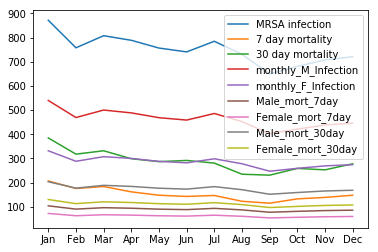

In [22]:
# line plot to visualize relationship of the time of year to infection and mortality counts. 
ax = monthlymort.plot()
ax.set_xticks(monthlymort.index)
ax.set_xticklabels(monthlymort.Month)

# Increase the area of the plot
ax = plt.rcParams['figure.figsize'] = (10, 8)
ax

#### The plots below indicate a positive relationship between the variables.

C:\Users\James\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


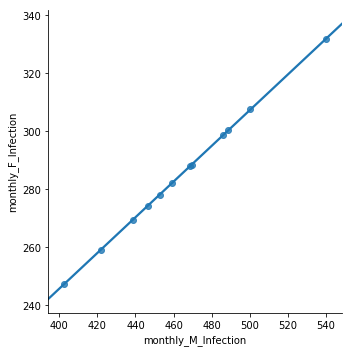

In [23]:
sns.lmplot(x="monthly_M_Infection", y="monthly_F_Infection", data=monthlymort)

C:\Users\James\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


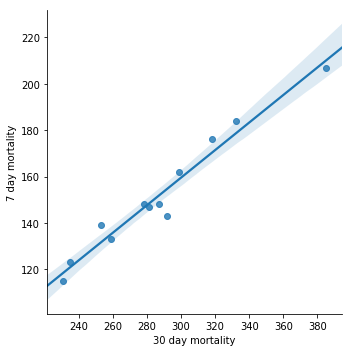

In [24]:
sns.lmplot(y="7 day mortality", x="30 day mortality", data=monthlymort)

C:\Users\James\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


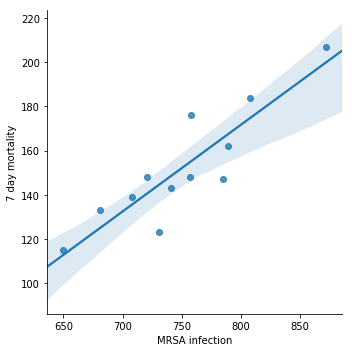

In [25]:
sns.lmplot(x = "MRSA infection", y = "7 day mortality", data = monthlymort)

C:\Users\James\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


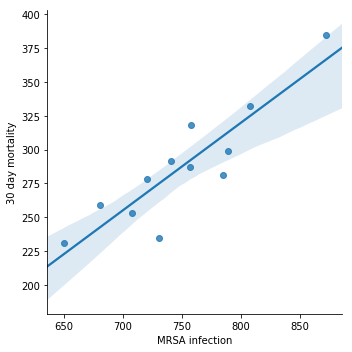

In [26]:
sns.lmplot(x = "MRSA infection", y = "30 day mortality", data = monthlymort)

In [27]:
# add up all the variables.
monthlymort.sum()

Month                  JanFebMarAprMayJunJulAugSepOctNovDec
MRSA infection                                         9001
7 day mortality                                        1825
30 day mortality                                       3450
monthly_M_Infection                                    5575
monthly_F_Infection                                    3426
Male_mort_7day                                         1075
Female_mort_7day                                        750
Male_mort_30day                                        2105
Female_mort_30day                                      1345
dtype: object

In [49]:
# Create a dataframe for 
dateRng = pd.date_range(start='1/1/2004', end='1/31/2005')


In [50]:
mrsaYear = pd.DataFrame(np.random.binomial(25,.62,len(dateRng)), index=dateRng, columns = ['Male Mortality'])
mrsaYear

,Male Mortality
2004-01-01,21
2004-01-02,18
2004-01-03,16
2004-01-04,15
2004-01-05,15
2004-01-06,10
2004-01-07,12
2004-01-08,13
2004-01-09,13
2004-01-10,14


#### Simulate the data for the the month of January. All months can be done in a similar way and use pd.concat to simulate the whole years data.

In [30]:
# DataFrame for simulated data 
jan = pd.DataFrame({'M_infection':np.random.binomial(28, .62, 31), 'F_infection': np.random.binomial(28, .38, 31), 'M_7dayMort': np.random.binomial(7, .59, 31), 'F_7dayMort': np.random.binomial(7, .41, 31), 'M_30dayMort': np.random.binomial(12, .61, 31),  'F_30dayMort': np.random.binomial(12, .39, 31) })
jan

,M_infection,F_infection,M_7dayMort,F_7dayMort,M_30dayMort,F_30dayMort
0,13,12,4,3,8,3
1,13,11,5,2,5,3
2,19,13,3,3,9,3
3,19,16,6,3,9,3
4,15,16,6,5,9,5
5,16,16,5,3,7,6
6,18,10,4,4,7,4
7,14,10,5,1,7,7
8,17,9,6,3,9,2
9,14,8,4,2,7,5


In [31]:
jan.sum()

M_infection    516
F_infection    348
M_7dayMort     127
F_7dayMort      96
M_30dayMort    241
F_30dayMort    140
dtype: int64

In [32]:
feb = pd.DataFrame({'M_infection':np.random.binomial(27, .62, 28), 'F_infection': np.random.binomial(27, .38, 28), 'M_7dayMort': np.random.binomial(6, .59, 28), 'F_7dayMort': np.random.binomial(6, .41, 28), 'M_30dayMort': np.random.binomial(11, .61, 28),  'F_30dayMort': np.random.binomial(11, .39, 28) })
feb

,M_infection,F_infection,M_7dayMort,F_7dayMort,M_30dayMort,F_30dayMort
0,14,12,4,2,8,4
1,17,8,3,3,6,4
2,16,12,5,2,8,4
3,14,6,3,3,7,5
4,20,12,2,4,6,5
5,18,12,5,4,9,5
6,16,11,3,3,10,4
7,16,5,2,2,5,5
8,15,7,2,3,10,5
9,15,7,5,1,8,9


In [33]:
jan['month'] = 'January'
feb['month'] = 'February'
year = pd.concat([jan, feb], ignore_index=True)
year

,M_infection,F_infection,M_7dayMort,F_7dayMort,M_30dayMort,F_30dayMort,month
0,13,12,4,3,8,3,January
1,13,11,5,2,5,3,January
2,19,13,3,3,9,3,January
3,19,16,6,3,9,3,January
4,15,16,6,5,9,5,January
5,16,16,5,3,7,6,January
6,18,10,4,4,7,4,January
7,14,10,5,1,7,7,January
8,17,9,6,3,9,2,January
9,14,8,4,2,7,5,January


C:\Users\James\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


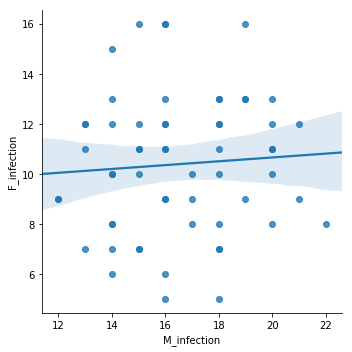

In [34]:
sns.lmplot(x='M_infection', y = 'F_infection', data = year)

In [35]:
# total monthly infection / days in a year = average daily infection
9001/365

24.660273972602738

In [36]:
ageMort = pd.DataFrame({"Age": ["<15", '15-34', '35-44', '45-54', '55-64', '65-74', '75-84', '>85'], "Infections": (126, 377, 462, 696, 1189, 1900, 2738, 1513), "7 Day Mortality": (2, 12, 42, 94, 193, 360, 697, 425), "30 Day Mortality" : (8, 29, 86, 182, 323, 697, 1266, 859)})
ageMort

,Age,Infections,7 Day Mortality,30 Day Mortality
0,<15,126,2,8
1,15-34,377,12,29
2,35-44,462,42,86
3,45-54,696,94,182
4,55-64,1189,193,323
5,65-74,1900,360,697
6,75-84,2738,697,1266
7,>85,1513,425,859


In [37]:
ageMort.std()

Infections          889.474072
7 Day Mortality     247.184973
30 Day Mortality    460.494687
dtype: float64

[Text(0,0,'<15'),
 Text(0,0,'15-34'),
 Text(0,0,'35-44'),
 Text(0,0,'45-54'),
 Text(0,0,'55-64'),
 Text(0,0,'65-74'),
 Text(0,0,'75-84'),
 Text(0,0,'>85')]

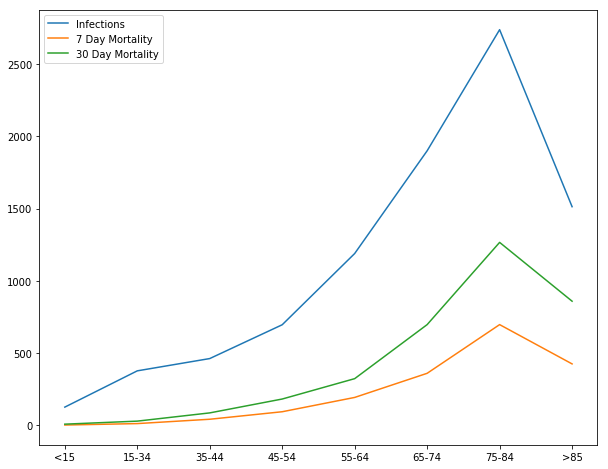

In [38]:
# line plot to visualize relationship of Age to infections and mortality counts. 
ax = ageMort.plot()
ax.set_xticks(ageMort.index)
ax.set_xticklabels(ageMort.Age)

In [39]:
ageMort['infection/year'] =  ageMort['Infections']/365 
ageMort['7dayP'] = ageMort['7 Day Mortality'] / ageMort['Infections']
ageMort['30dayP'] = ageMort['30 Day Mortality'] / ageMort['Infections']

In [40]:
ageMort

,Age,Infections,7 Day Mortality,30 Day Mortality,infection/year,7dayP,30dayP
0,<15,126,2,8,0.345205,0.015873,0.063492
1,15-34,377,12,29,1.032877,0.031830,0.076923
2,35-44,462,42,86,1.265753,0.090909,0.186147
3,45-54,696,94,182,1.906849,0.135057,0.261494
4,55-64,1189,193,323,3.257534,0.162321,0.271657
5,65-74,1900,360,697,5.205479,0.189474,0.366842
6,75-84,2738,697,1266,7.501370,0.254565,0.462381
7,>85,1513,425,859,4.145205,0.280899,0.567746


In [41]:
# <15   - 0.35, 0.02, 0.06
# 15-34 - 1.03, 0.03, 0.08
# 35-44 - 1.27, 0.09, 19
# 45-54 - 1.91, 0.14, 0.26
# 55-64 - 3.26, 0.16, .27
# 65-74 - 5.21, 0.18, 0.37
# 75-84 - 7.50, 0.25, 0.46 
# >85   - 4.15, 0.28, 0.57  


In [42]:
# Simulated data for Infections according to age per year and 7 and 30 day mortality

# The <15 category uses the binomial distribution
# For the rest, the normal distribution is used instead
a = pd.DataFrame({'Sim<15': np.random.binomial(1, .35, 365), 'Sim 15-34': np.random.normal(1.03, 0.01, 365), 'Sim 35-44': np.random.normal(1.27, 0.01, 365), 'Sim 45-54': np.random.normal(1.91, 0.01, 365), 'Sim 55-64': np.random.normal(3.26, 0.01, 365), 'Sim 65-74':np.random.normal(5.21, 0.01, 365), 'Sim 75-84': np.random.normal(7.5, 0.01, 365), 'Sim >85': np.random.normal(4.15, 0.01, 365) })


In [43]:
a

,Sim<15,Sim 15-34,Sim 35-44,Sim 45-54,Sim 55-64,Sim 65-74,Sim 75-84,Sim >85
0,0,1.013183,1.268963,1.922705,3.266112,5.212726,7.484832,4.150052
1,0,1.036684,1.273691,1.909928,3.240746,5.218601,7.512523,4.154139
2,0,1.045075,1.272707,1.897250,3.253384,5.208685,7.506765,4.151663
3,0,1.028517,1.272646,1.909485,3.266408,5.212062,7.512981,4.138350
4,0,1.018744,1.286681,1.891678,3.276882,5.218967,7.495803,4.153591
5,1,1.017835,1.265856,1.905577,3.251882,5.197589,7.514504,4.152873
6,0,1.036168,1.286804,1.924314,3.260889,5.221167,7.495607,4.159500
7,1,1.036981,1.269932,1.905149,3.251887,5.190526,7.482163,4.154668
8,1,1.045068,1.268797,1.892905,3.260762,5.196544,7.487881,4.146571
9,0,1.025281,1.260168,1.894644,3.263003,5.209565,7.486772,4.142608


In [44]:
a.sum()

Sim<15        145.000000
Sim 15-34     375.960348
Sim 35-44     463.743995
Sim 45-54     696.846402
Sim 55-64    1189.684891
Sim 65-74    1901.380776
Sim 75-84    2737.698386
Sim >85      1514.485207
dtype: float64

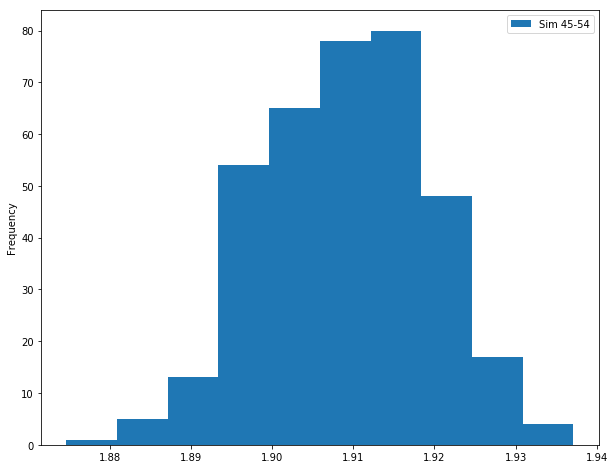

In [45]:
a.plot(x = 'Sim 15-34', y = 'Sim 45-54', kind = 'hist')

#### The research paper stated that mortality rates are higher in women in all age groups but the data was not presented, nor was it broken down into a monthly format between male and female. A simulation of the number of infected persons grouped into  gender and considering the month of infection is detailed below. An easier option would have been to simulate by year but this would not account for the trend shown in infections by month. 

In [46]:
# Simulated data for daily infection of males and females for the year
infection = pd.DataFrame({"maleInfection": np.random.binomial(25, .62, 365), "femaleInfection": np.random.binomial(25, .38, 365)})


In [47]:
infection.sum()

maleInfection      5602
femaleInfection    3435
dtype: int64

In [48]:
infection.describe()

,maleInfection,femaleInfection
count,365.000000,365.000000
mean,15.347945,9.410959
std,2.393220,2.539986
min,9.000000,2.000000
25%,14.000000,8.000000
50%,15.000000,9.000000
75%,17.000000,11.000000
max,21.000000,17.000000
